## EDA,Feature Engineering and KPI Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps  to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Feature Engineering

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [11]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
df.shape

(10841, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
##summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [15]:
##Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insights and observation
The dataset has msising values

In [76]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,installs_clean,reviews_clean,rating_clean,price_clean,category_clean,inst_to_review_ratio,estimated_revenue,arpu_proxy,low_rating_flag
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,10000,159,4.1,0.0,ART_AND_DESIGN,15.900,0.0,0.0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,500000,967,3.9,0.0,ART_AND_DESIGN,1.934,0.0,0.0,0


## Data Cleaning

In [107]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [108]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce').fillna(0).astype(int)


In [109]:
import pandas as pd
import numpy as np

# 1. Convert everything to string first
df['Reviews'] = df['Reviews'].astype(str)

# 2. Count purely numeric rows
numeric_count = df['Reviews'].str.isnumeric().sum()
print("Numeric count using isnumeric():", numeric_count)


Numeric count using isnumeric(): 10841


In [110]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,installs_clean,reviews_clean,rating_clean,price_clean,category_clean,inst_to_review_ratio,estimated_revenue,arpu_proxy,low_rating_flag


In [111]:
df_copy=df.copy()

In [112]:
df_copy=df_copy.drop(df_copy.index[10472])

In [113]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,installs_clean,reviews_clean,rating_clean,price_clean,category_clean,inst_to_review_ratio,estimated_revenue,arpu_proxy,low_rating_flag


In [114]:
## Convert Review Datatype to int
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [115]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   App                   10840 non-null  object 
 1   Category              10840 non-null  object 
 2   Rating                9366 non-null   float64
 3   Reviews               10840 non-null  int32  
 4   Size                  10840 non-null  object 
 5   Installs              10840 non-null  object 
 6   Type                  10839 non-null  object 
 7   Price                 10840 non-null  object 
 8   Content Rating        10840 non-null  object 
 9   Genres                10840 non-null  object 
 10  Last Updated          10840 non-null  object 
 11  Current Ver           10832 non-null  object 
 12  Android Ver           10838 non-null  object 
 13  installs_clean        10840 non-null  int32  
 14  reviews_clean         10840 non-null  int32  
 15  rating_clean          93

In [116]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

19000K==19M

In [117]:
df_copy['Size'].isnull().sum()

0

In [118]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [119]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [121]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [122]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [123]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [124]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [125]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [126]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

In [127]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   App                   10840 non-null  object 
 1   Category              10840 non-null  object 
 2   Rating                9366 non-null   float64
 3   Reviews               10840 non-null  int32  
 4   Size                  9145 non-null   float64
 5   Installs              10840 non-null  int32  
 6   Type                  10839 non-null  object 
 7   Price                 10840 non-null  float64
 8   Content Rating        10840 non-null  object 
 9   Genres                10840 non-null  object 
 10  Last Updated          10840 non-null  object 
 11  Current Ver           10832 non-null  object 
 12  Android Ver           10838 non-null  object 
 13  installs_clean        10840 non-null  int32  
 14  reviews_clean         10840 non-null  int32  
 15  rating_clean          93

In [128]:
## Handlling Last update feature
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [129]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [130]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   App                   10840 non-null  object        
 1   Category              10840 non-null  object        
 2   Rating                9366 non-null   float64       
 3   Reviews               10840 non-null  int32         
 4   Size                  9145 non-null   float64       
 5   Installs              10840 non-null  int32         
 6   Type                  10839 non-null  object        
 7   Price                 10840 non-null  float64       
 8   Content Rating        10840 non-null  object        
 9   Genres                10840 non-null  object        
 10  Last Updated          10840 non-null  datetime64[ns]
 11  Current Ver           10832 non-null  object        
 12  Android Ver           10838 non-null  object        
 13  installs_clean       

In [131]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,rating_clean,price_clean,category_clean,inst_to_review_ratio,estimated_revenue,arpu_proxy,low_rating_flag,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,...,4.1,0.0,ART_AND_DESIGN,15.90000,0.0,0.0,0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,3.9,0.0,ART_AND_DESIGN,1.93400,0.0,0.0,0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,4.7,0.0,ART_AND_DESIGN,17.50200,0.0,0.0,0,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,...,4.5,0.0,ART_AND_DESIGN,4.31288,0.0,0.0,0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,...,4.3,0.0,ART_AND_DESIGN,9.67000,0.0,0.0,0,20,6,2018


In [135]:
import os

# Create 'data' folder if it doesn't exist
os.makedirs('data', exist_ok=True)

# Now save the file
df_copy.to_csv('data/google_cleaned.csv', index=False)


## EDA


In [136]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,rating_clean,price_clean,category_clean,inst_to_review_ratio,estimated_revenue,arpu_proxy,low_rating_flag,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,...,4.1,0.0,ART_AND_DESIGN,15.90000,0.0,0.0,0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,3.9,0.0,ART_AND_DESIGN,1.93400,0.0,0.0,0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,4.7,0.0,ART_AND_DESIGN,17.50200,0.0,0.0,0,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,...,4.5,0.0,ART_AND_DESIGN,4.31288,0.0,0.0,0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,...,4.3,0.0,ART_AND_DESIGN,9.67000,0.0,0.0,0,20,6,2018


In [137]:
df_copy[df_copy.duplicated('App')].shape

(1181, 25)

## Observation
The dataset has duplicate records

In [139]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [53]:
df_copy.shape

(9659, 16)

## Explore Data

In [140]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 17 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'installs_clean', 'reviews_clean', 'rating_clean', 'price_clean', 'inst_to_review_ratio', 'estimated_revenue', 'arpu_proxy', 'low_rating_flag', 'Day', 'Month', 'Year']

We have 8 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver', 'category_clean']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [144]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('---------------------------')

App
ROBLOX                                                0.083018
CBS Sports App - Scores, News, Stats & Watch Live     0.073794
ESPN                                                  0.064570
Duolingo: Learn Languages Free                        0.064570
Candy Crush Saga                                      0.064570
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009224
U-Report                                              0.009224
U of I Community Credit Union                         0.009224
Waiting For U Launcher Theme                          0.009224
iHoroscope - 2018 Daily Horoscope & Astrology         0.009224
Name: proportion, Length: 9660, dtype: float64
---------------------------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION      

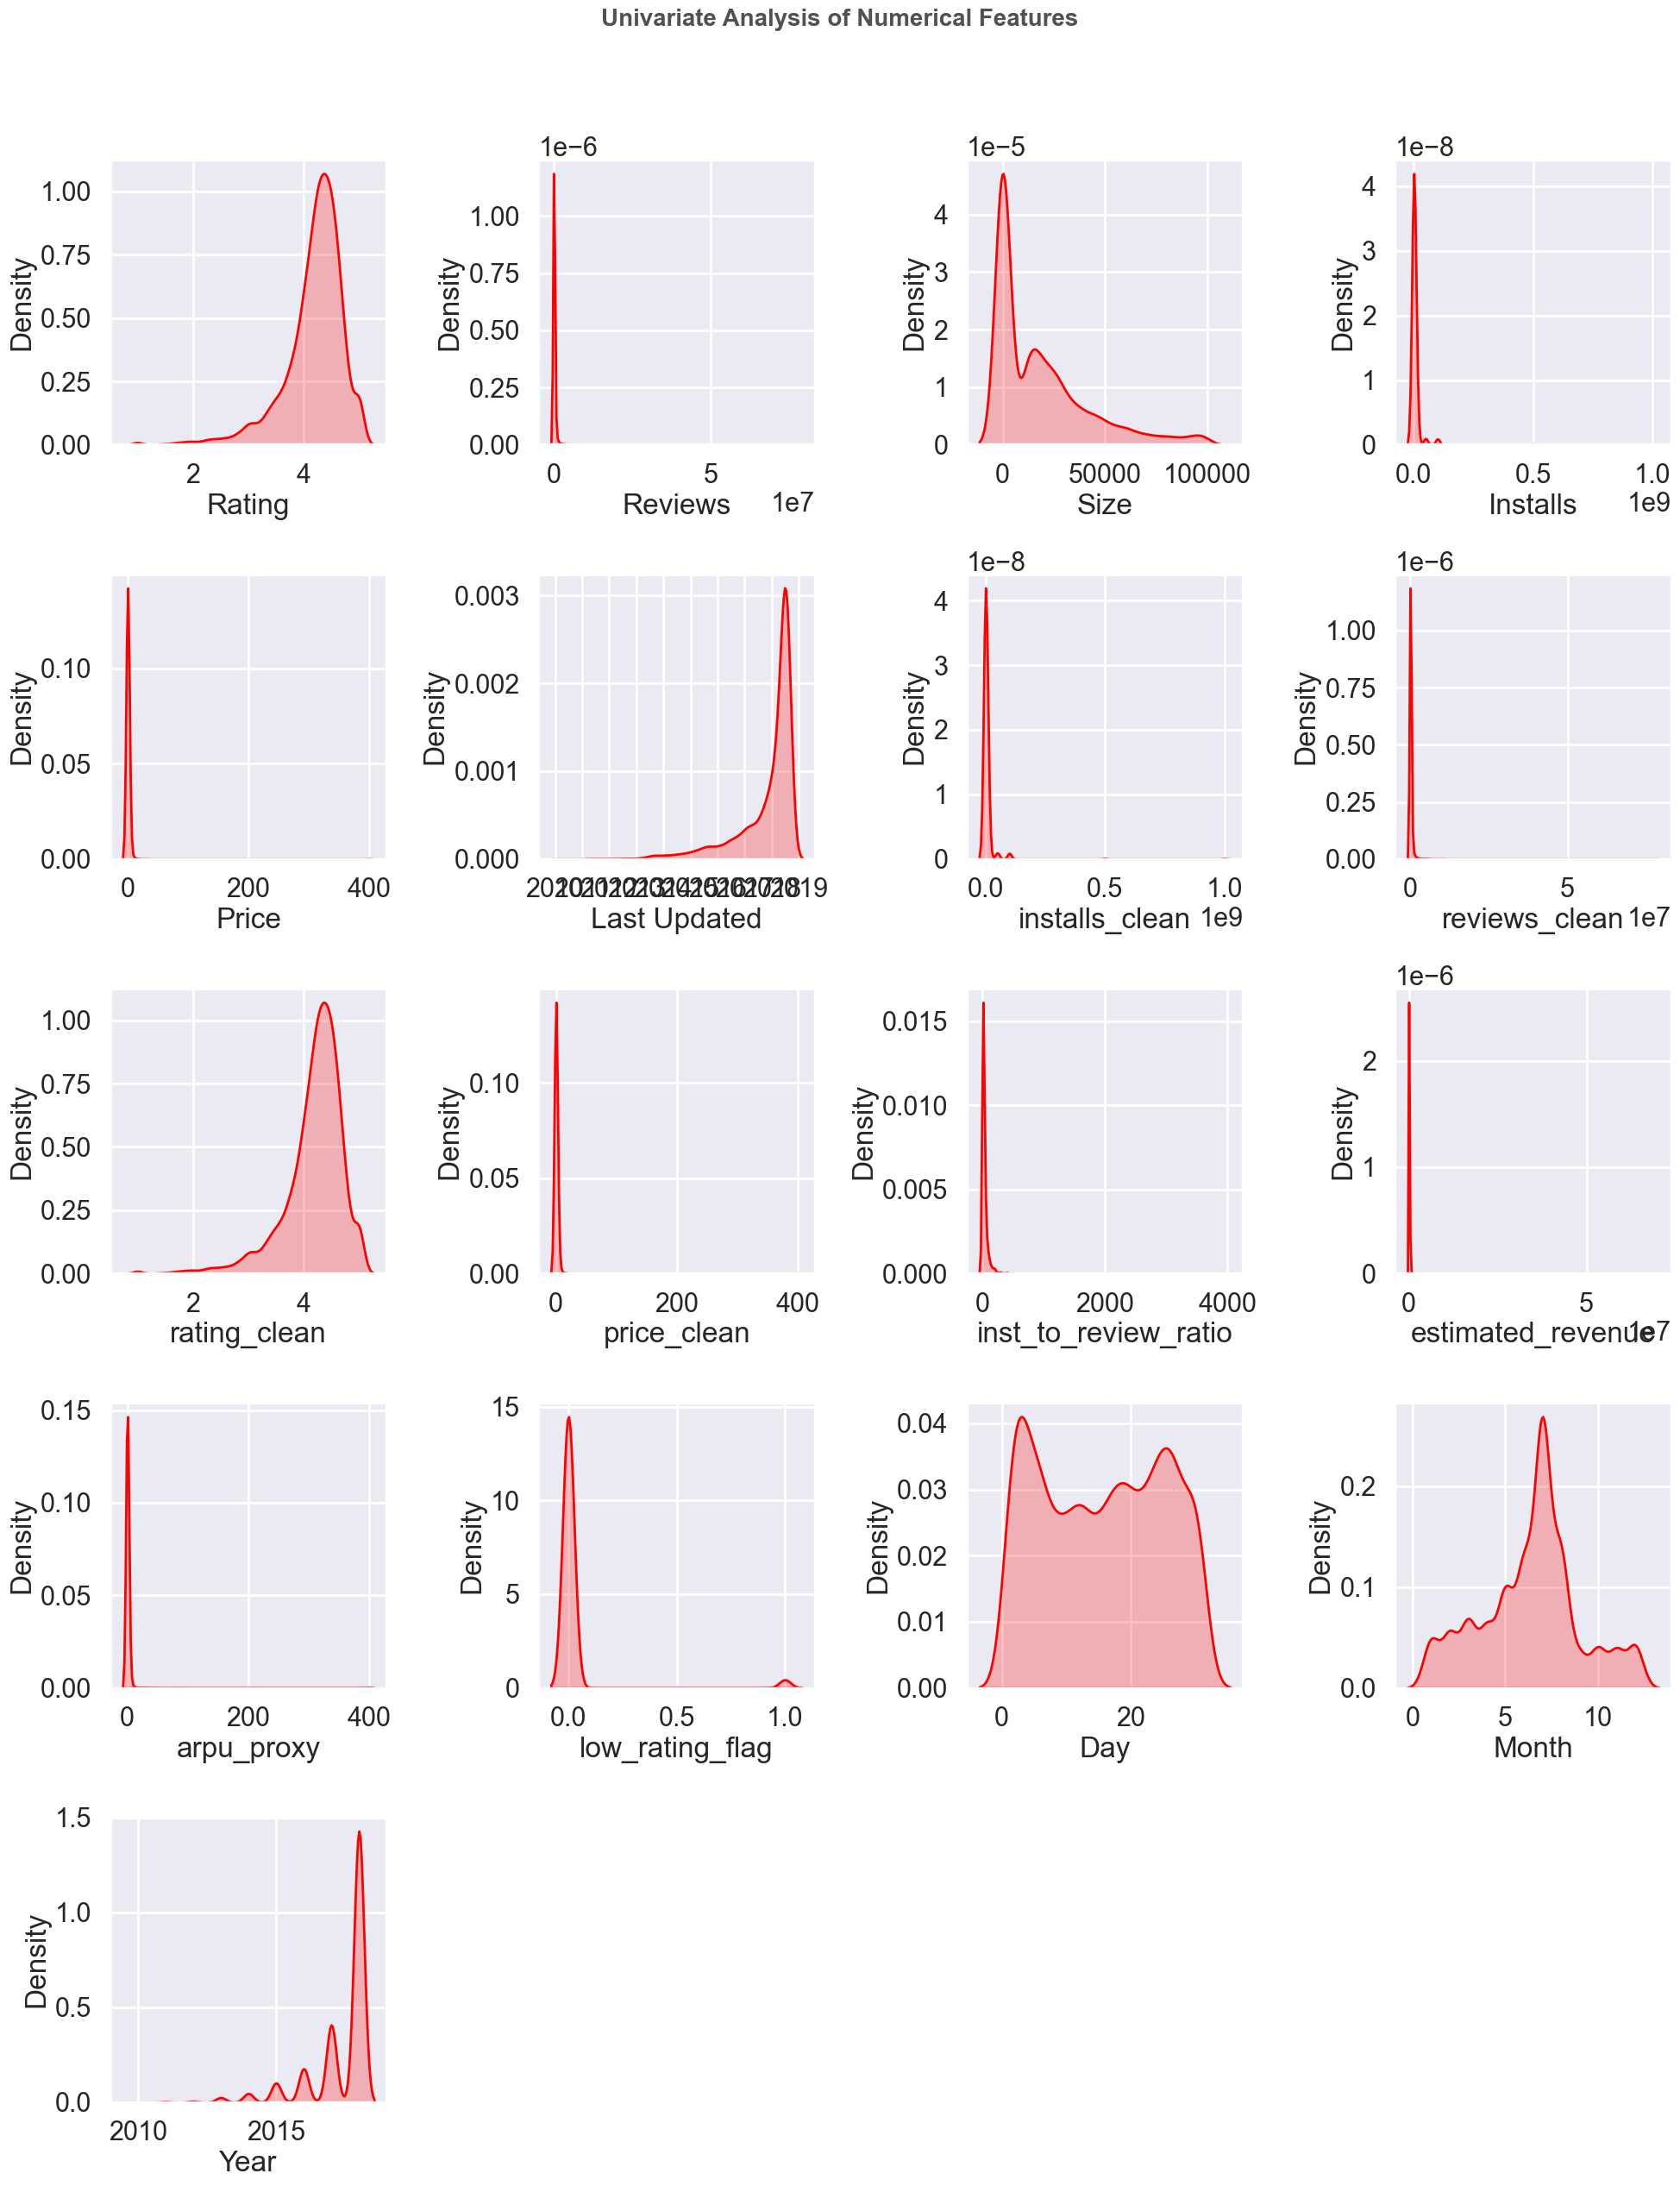

In [150]:
import math

n = len(numeric_features)
cols = 4  # number of columns you want
rows = math.ceil(n / cols)

plt.figure(figsize=(5 * cols, 5 * rows))
plt.suptitle('Univariate Analysis of Numerical Features',
             fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(n):
    plt.subplot(rows, cols, i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]], shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

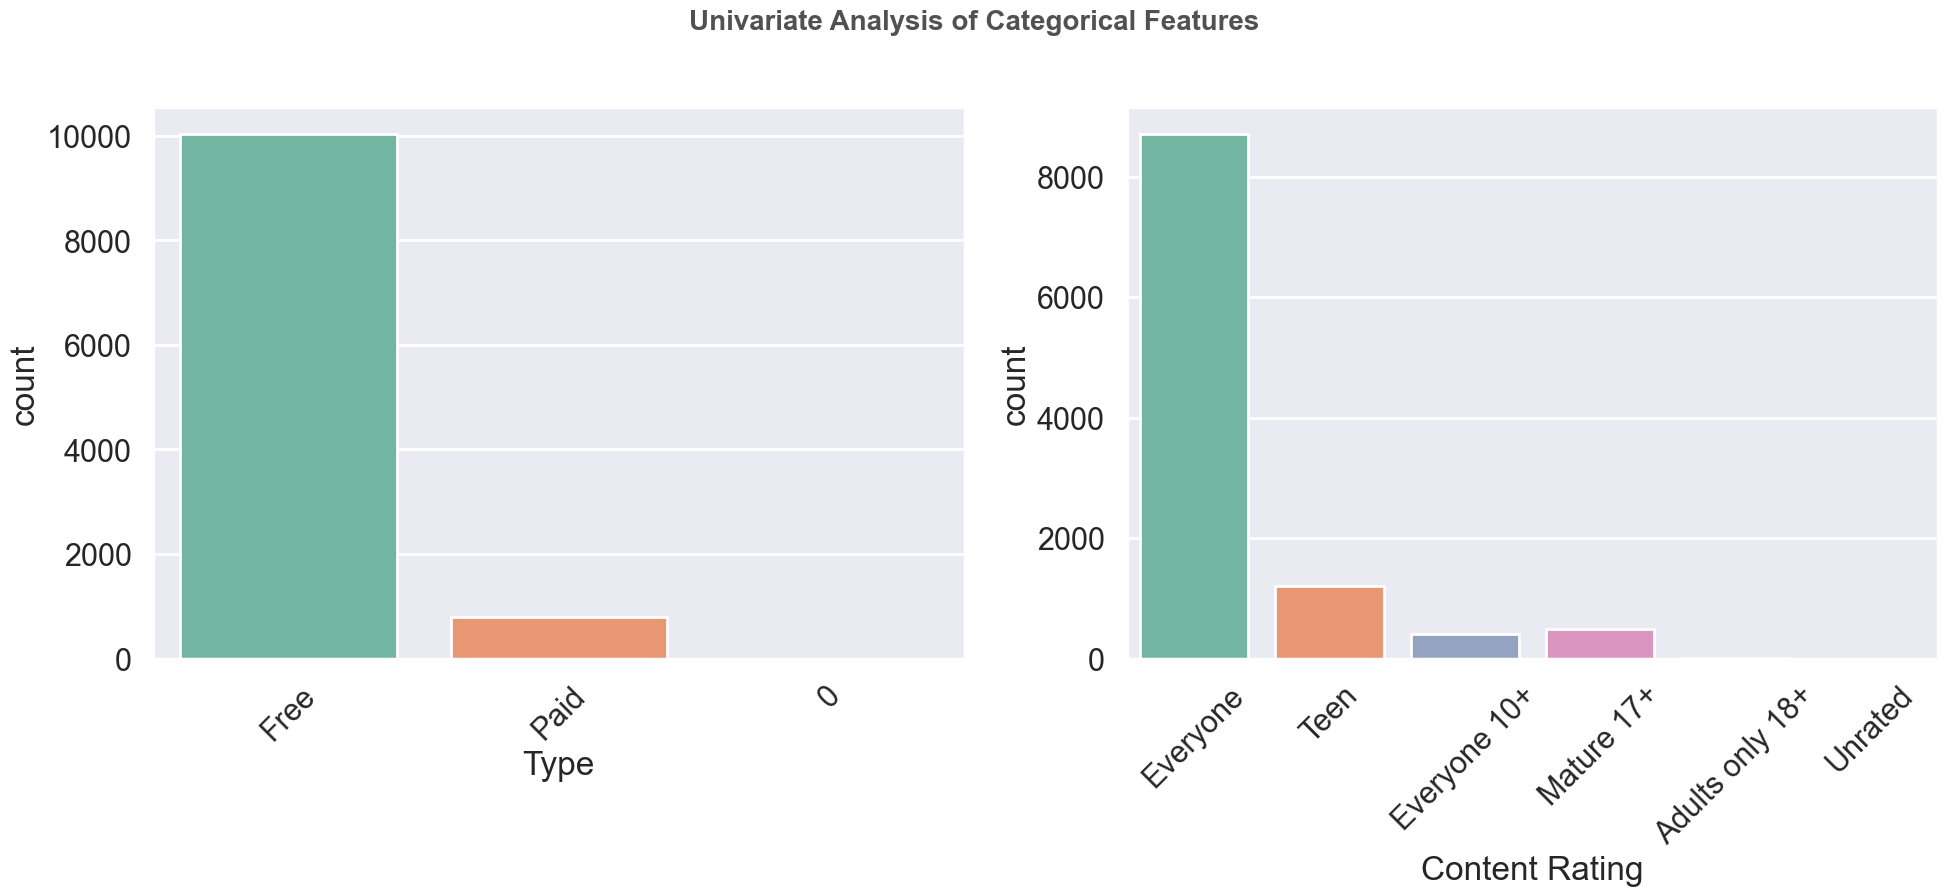

In [151]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

## Which is the most popular app category?

In [152]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,rating_clean,price_clean,category_clean,inst_to_review_ratio,estimated_revenue,arpu_proxy,low_rating_flag,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,...,4.1,0.0,ART_AND_DESIGN,15.900,0.0,0.0,0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,3.9,0.0,ART_AND_DESIGN,1.934,0.0,0.0,0,15,1,2018


<Axes: ylabel='count'>

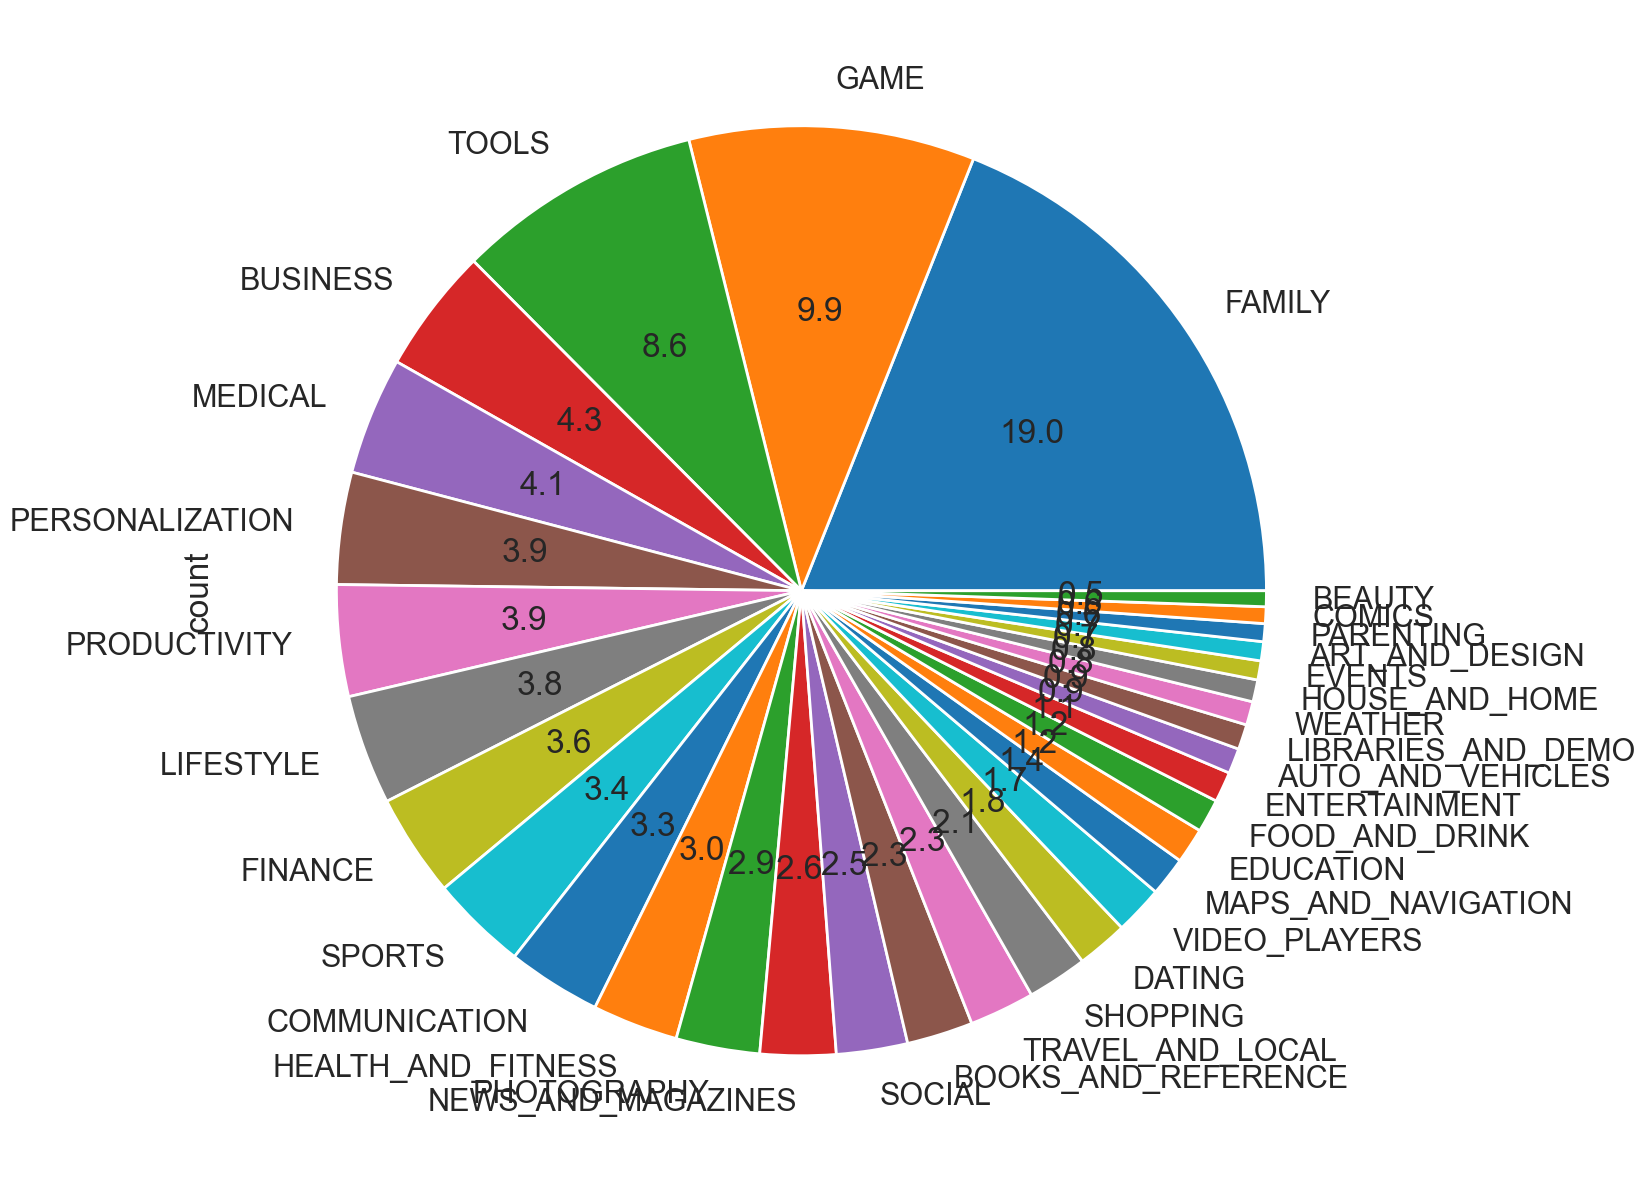

In [153]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [157]:
## Top 10 App Categories
category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [158]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


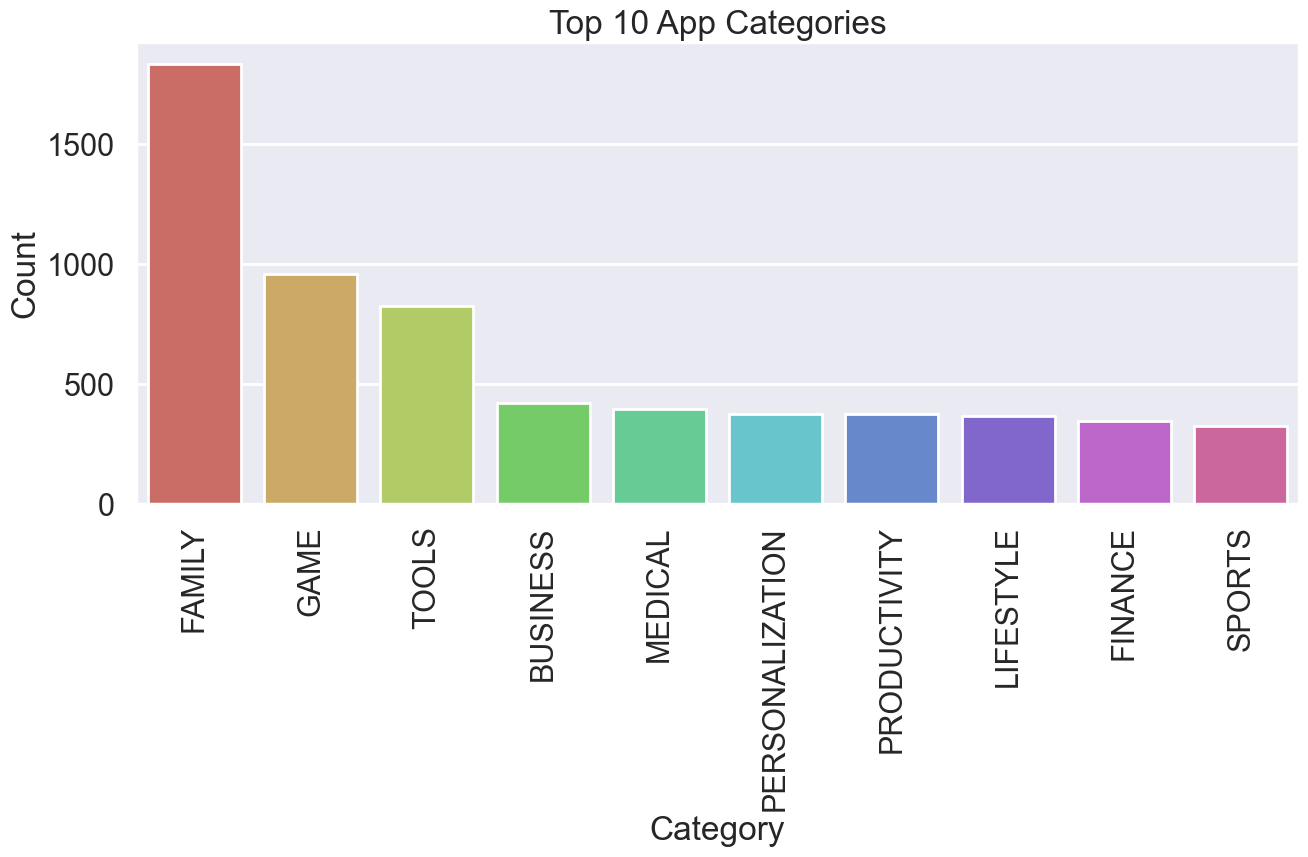

In [160]:
# Ensure it's a DataFrame
category_df = df_copy['Category'].value_counts().reset_index()
category_df.columns = ['Category', 'Count']

plt.figure(figsize=(15, 6))
sns.barplot(x='Category', y='Count', data=category_df.head(10), palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()


## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Questions:
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

## Which Category has largest number of installations??

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

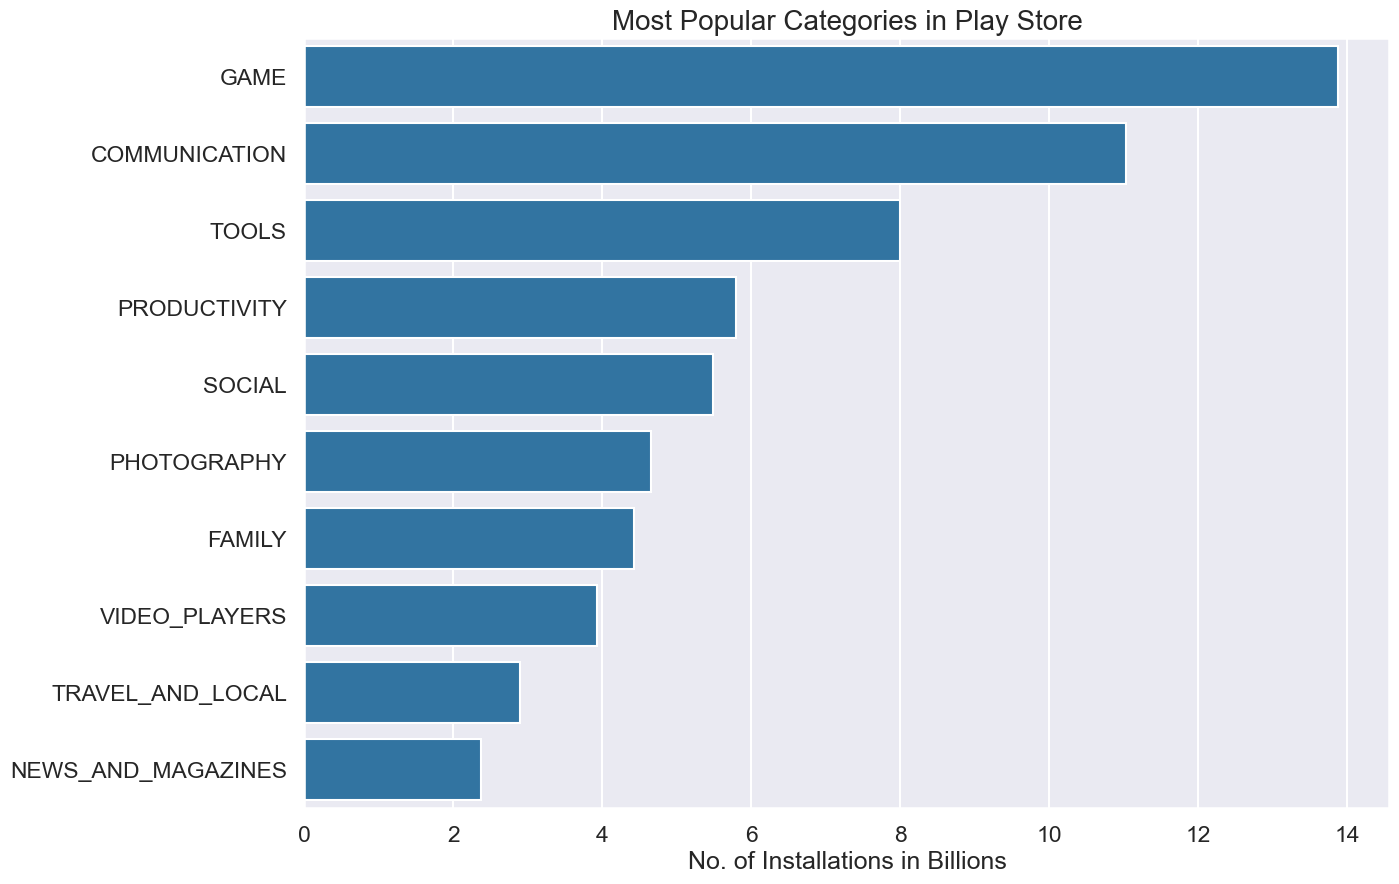

In [161]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

## What are the Top 5 most installed Apps in Each popular Categories ??

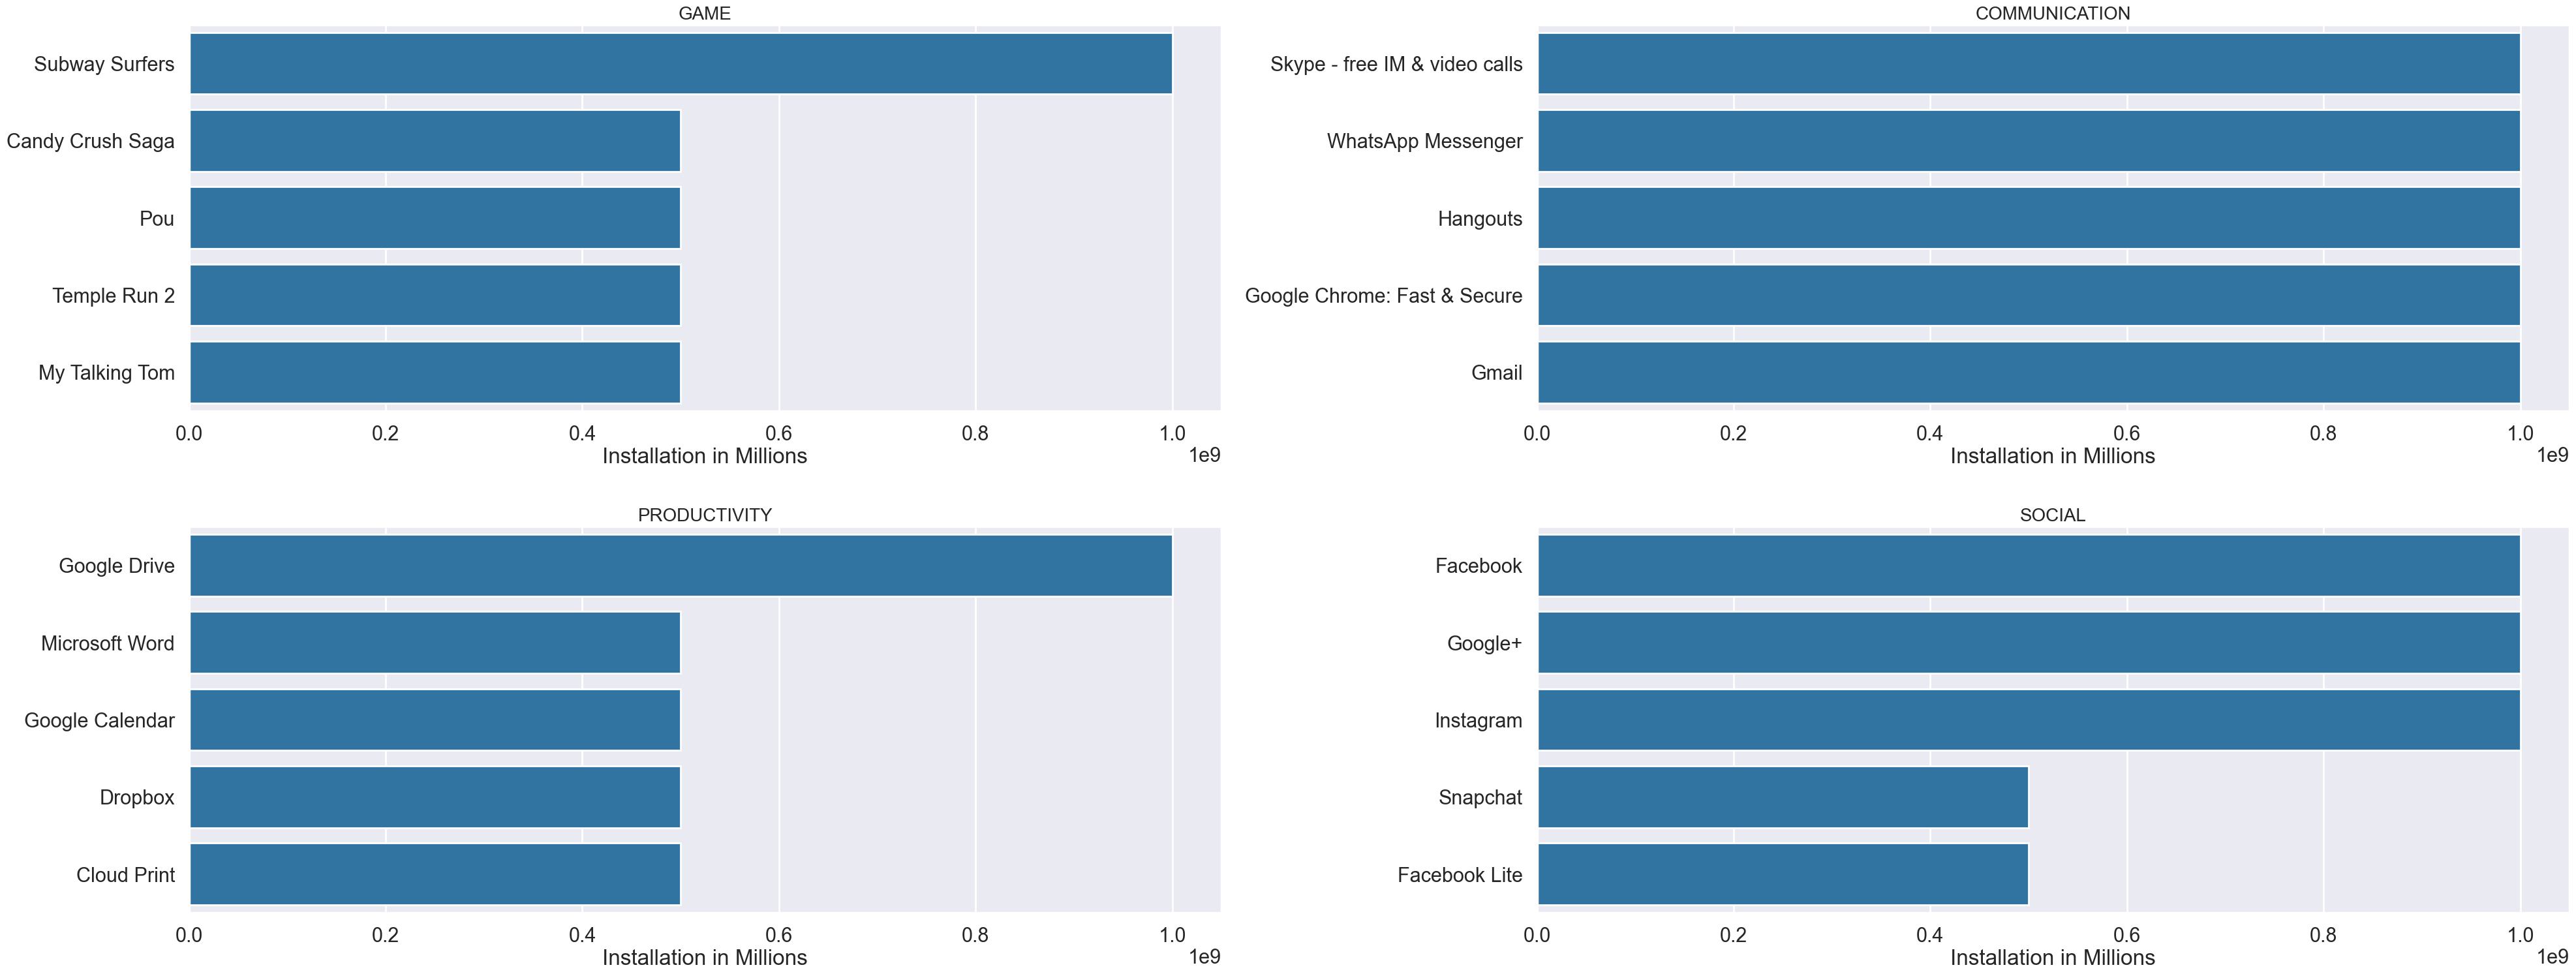

In [162]:
dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## How many apps are there on Google Play Store which get 5 ratings??

In [163]:
rating = df_copy.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category

In [164]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,rating_clean,price_clean,category_clean,inst_to_review_ratio,estimated_revenue,arpu_proxy,low_rating_flag,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,...,4.1,0.0,ART_AND_DESIGN,15.90000,0.0,0.0,0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,3.9,0.0,ART_AND_DESIGN,1.93400,0.0,0.0,0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,4.7,0.0,ART_AND_DESIGN,17.50200,0.0,0.0,0,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,...,4.5,0.0,ART_AND_DESIGN,4.31288,0.0,0.0,0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,...,4.3,0.0,ART_AND_DESIGN,9.67000,0.0,0.0,0,20,6,2018



## KPI Analysis & Dashboard:
This notebook section adds Google-relevant KPIs and simple dashboard visuals for the Playstore dataset.
**What was added (high level):**
- Data cleaning helpers (installs, price, reviews fields)
- KPI calculations (Install-to-Review ratio, ARPU proxy, Estimated Revenue, Low-rating churn proxy)
- Category-level aggregations and a summary table
- Matplotlib charts (top categories by installs, ARPU proxy, installs vs reviews scatter)





In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

# STEP 1: Update the file path
dataset_path = "googleplaystore.csv"  # Replace with your actual filename

# STEP 2: Check file existence
if not Path(dataset_path).exists():
    print("Current directory:", os.getcwd())
    print("Files available:", os.listdir())
    raise FileNotFoundError(
        f"Dataset not found. Make sure '{dataset_path}' is in the current directory."
    )

# STEP 3: Load the dataset
df = pd.read_csv(dataset_path, low_memory=False)
print("Loaded dataframe shape:", df.shape)

# STEP 4: Show first few rows
print("Columns in dataset:", df.columns.tolist())
df.head(3)


Loaded dataframe shape: (10841, 13)
Columns in dataset: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


In [169]:

# --- Basic cleaning and column normalization ---
df.columns = [c.strip() for c in df.columns]
# lower-case mapping helpers
cols_lower = {c.lower(): c for c in df.columns}

# Helper to get column names robustly
def find_col(possible_names):
    for name in possible_names:
        if name in cols_lower:
            return cols_lower[name]
    return None

installs_col = find_col(['installs','size','install','number_of_installs'])
reviews_col = find_col(['reviews','number_of_reviews','total_reviews','review'])
rating_col = find_col(['rating','ratings','review_score','score'])
price_col = find_col(['price','amount','cost'])
category_col = find_col(['category','genres','app_category','type','genre'])

print("Detected columns -> installs:", installs_col, "reviews:", reviews_col, "rating:", rating_col, "price:", price_col, "category:", category_col)

# Make cleaned columns if they exist
if installs_col is not None:
    s = df[installs_col].astype(str).fillna('0').str.replace(r'[+,]', '', regex=True).str.replace(r'[^0-9]', '', regex=True)
    # Replace empty strings with 0 and convert to int (coerce errors)
    s = s.replace('', '0')
    df['installs_clean'] = pd.to_numeric(s, errors='coerce').fillna(0).astype(int)
else:
    df['installs_clean'] = 0

if reviews_col is not None:
    df['reviews_clean'] = pd.to_numeric(df[reviews_col], errors='coerce').fillna(0).astype(int)
else:
    df['reviews_clean'] = 0

if rating_col is not None:
    df['rating_clean'] = pd.to_numeric(df[rating_col], errors='coerce')
else:
    df['rating_clean'] = np.nan

if price_col is not None:
    price_series = df[price_col].astype(str).fillna('0').str.replace(r'[^0-9\.\-]', '', regex=True)
    price_series = price_series.replace('', '0')
    df['price_clean'] = pd.to_numeric(price_series, errors='coerce').fillna(0.0)
else:
    df['price_clean'] = 0.0

# category handling
if category_col is not None:
    df['category_clean'] = df[category_col].astype(str).fillna('Unknown')
else:
    df['category_clean'] = 'Unknown'

# Basic sanity: ensure no negative installs
df.loc[df['installs_clean'] < 0, 'installs_clean'] = 0

print("Cleaning complete. Sample:")
df[['installs_clean','reviews_clean','rating_clean','price_clean','category_clean']].head(5)


Detected columns -> installs: Installs reviews: Reviews rating: Rating price: Price category: Category
Cleaning complete. Sample:


,installs_clean,reviews_clean,rating_clean,price_clean,category_clean
0,10000,159,4.1,0.0,ART_AND_DESIGN
1,500000,967,3.9,0.0,ART_AND_DESIGN
2,5000000,87510,4.7,0.0,ART_AND_DESIGN
3,50000000,215644,4.5,0.0,ART_AND_DESIGN
4,100000,967,4.3,0.0,ART_AND_DESIGN


In [170]:

# --- KPI calculations ---
# Install-to-Review Ratio (reviews per 1000 installs)
df['inst_to_review_ratio'] = df.apply(lambda r: (r['reviews_clean'] / r['installs_clean'])*1000 if r['installs_clean']>0 else np.nan, axis=1)

# Estimated Revenue (simple proxy) and ARPU
df['estimated_revenue'] = df['price_clean'] * df['installs_clean']   # naive proxy: price * installs
df['arpu_proxy'] = df.apply(lambda r: (r['estimated_revenue']/r['installs_clean']) if r['installs_clean']>0 else 0.0, axis=1)

# Low-rating churn proxy (flag apps with average rating < 3.0)
df['low_rating_flag'] = df['rating_clean'].apply(lambda x: 1 if (pd.notnull(x) and x < 3.0) else 0)

# Category-level aggregations
category_summary = df.groupby('category_clean').agg(
    total_apps = ('category_clean', 'count'),
    total_installs = ('installs_clean', 'sum'),
    avg_rating = ('rating_clean', 'mean'),
    avg_inst_to_review_per_1000 = ('inst_to_review_ratio', 'mean'),
    total_estimated_revenue = ('estimated_revenue','sum'),
    avg_arpu = ('arpu_proxy','mean'),
    pct_low_rating = ('low_rating_flag','mean')
).reset_index()

# Convert fraction to percentage where appropriate
category_summary['pct_low_rating'] = (category_summary['pct_low_rating']*100).round(2)
category_summary = category_summary.sort_values('total_installs', ascending=False).reset_index(drop=True)
category_summary.head(10)


,category_clean,total_apps,total_installs,avg_rating,avg_inst_to_review_per_1000,total_estimated_revenue,avg_arpu,pct_low_rating
0,GAME,1144,35086024415,4.286326,56.873530,4.098764e+07,0.251136,0.70
1,COMMUNICATION,387,32647276251,4.158537,31.683462,4.247364e+06,0.214832,1.55
2,PRODUCTIVITY,424,14176091369,4.211396,32.764586,4.313375e+06,0.226274,2.59
3,SOCIAL,295,14069867902,4.255598,51.911691,5.940000e+03,0.006712,1.02
4,TOOLS,843,11452771915,4.047411,32.603745,5.464821e+06,0.317023,5.22
5,FAMILY,1972,10258263505,4.192272,41.583029,1.860526e+08,1.232150,2.18
6,PHOTOGRAPHY,335,10088247655,4.192114,27.123830,2.092277e+07,0.400627,3.28
7,NEWS_AND_MAGAZINES,283,7496317760,4.132189,29.497017,6.445000e+03,0.014064,3.53
8,TRAVEL_AND_LOCAL,258,6868887146,4.109292,20.330573,1.151504e+06,0.178140,2.33
9,VIDEO_PLAYERS,175,6222002720,4.063750,29.142974,3.352900e+05,0.059771,3.43


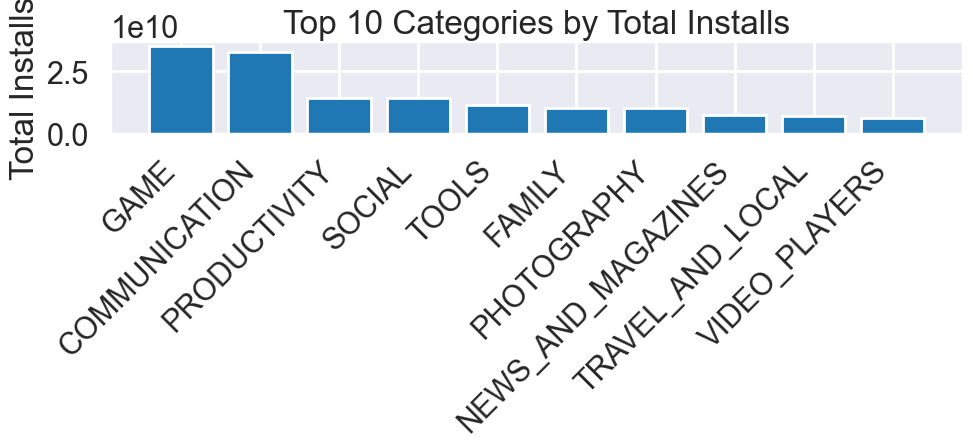

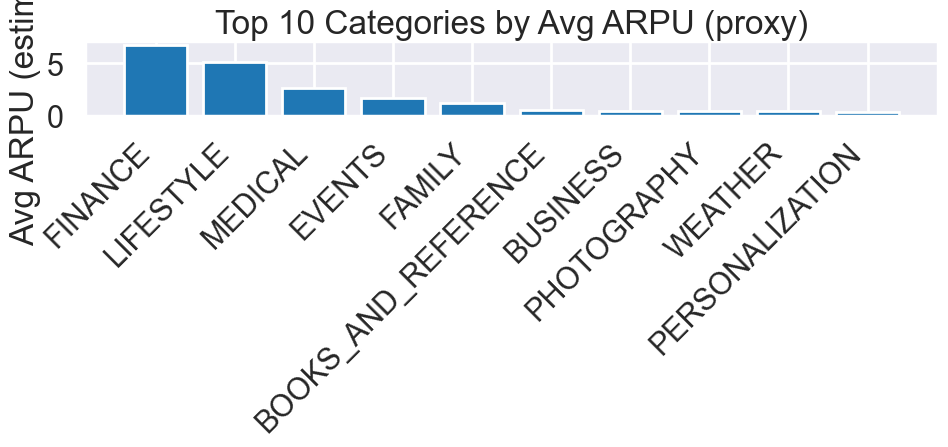

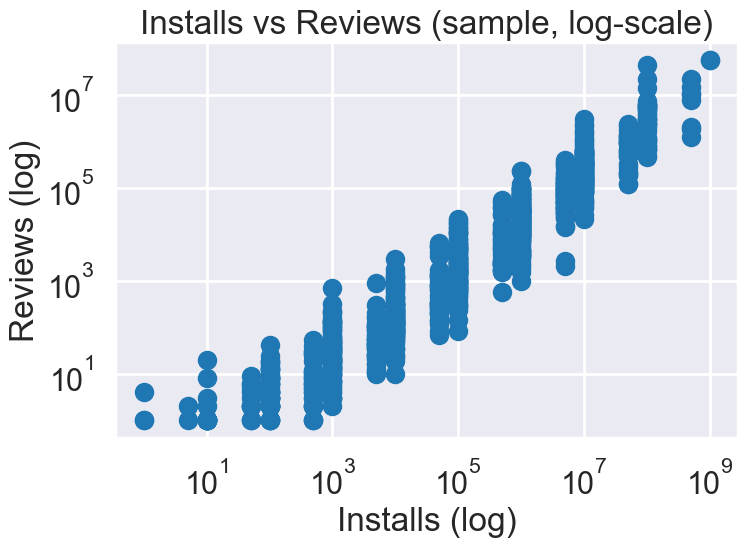

In [171]:

# --- Plots (matplotlib only) ---
# Top 10 categories by total installs
top10 = category_summary.head(10)
plt.figure(figsize=(10,5))
plt.bar(top10['category_clean'], top10['total_installs'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Categories by Total Installs')
plt.ylabel('Total Installs')
plt.tight_layout()
plt.show()

# Top 10 categories by avg ARPU (with at least some installs)
top_arpu = category_summary[category_summary['total_installs']>0].sort_values('avg_arpu', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top_arpu['category_clean'], top_arpu['avg_arpu'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Categories by Avg ARPU (proxy)')
plt.ylabel('Avg ARPU (estimated)')
plt.tight_layout()
plt.show()

# Scatter: installs vs reviews (sample to avoid overplotting)
sample_df = df[df['installs_clean']>0].sample(min(1000, len(df)), random_state=42)
plt.figure(figsize=(8,6))
plt.scatter(sample_df['installs_clean'], sample_df['reviews_clean'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Installs (log)')
plt.ylabel('Reviews (log)')
plt.title('Installs vs Reviews (sample, log-scale)')
plt.tight_layout()
plt.show()


In [173]:
# Prepare the display dataframe
display_df = category_summary[['category_clean','total_apps','total_installs',
                               'avg_rating','avg_inst_to_review_per_1000',
                               'avg_arpu','pct_low_rating']].copy()

# Rename columns for better readability
display_df = display_df.rename(columns={
    'category_clean':'Category',
    'total_apps':'#Apps',
    'total_installs':'Total Installs',
    'avg_rating':'Avg Rating',
    'avg_inst_to_review_per_1000':'Inst-to-Review per 1000',
    'avg_arpu':'Avg ARPU (proxy)',
    'pct_low_rating':'% Low Rating'
})

# Display first 20 rows nicely
print("Playstore Category KPIs (Top 20):")
display(display_df.head(20))


Playstore Category KPIs (Top 20):


,Category,#Apps,Total Installs,Avg Rating,Inst-to-Review per 1000,Avg ARPU (proxy),% Low Rating
0,GAME,1144,35086024415,4.286326,56.873530,0.251136,0.70
1,COMMUNICATION,387,32647276251,4.158537,31.683462,0.214832,1.55
2,PRODUCTIVITY,424,14176091369,4.211396,32.764586,0.226274,2.59
3,SOCIAL,295,14069867902,4.255598,51.911691,0.006712,1.02
4,TOOLS,843,11452771915,4.047411,32.603745,0.317023,5.22
5,FAMILY,1972,10258263505,4.192272,41.583029,1.232150,2.18
6,PHOTOGRAPHY,335,10088247655,4.192114,27.123830,0.400627,3.28
7,NEWS_AND_MAGAZINES,283,7496317760,4.132189,29.497017,0.014064,3.53
8,TRAVEL_AND_LOCAL,258,6868887146,4.109292,20.330573,0.178140,2.33
9,VIDEO_PLAYERS,175,6222002720,4.063750,29.142974,0.059771,3.43



### What these KPIs mean (and limitations)
- **Install-to-Review Ratio (per 1000 installs):** a proxy for engagement. Higher values imply more reviews relative to installs (a simple engagement signal).  
- **ARPU (proxy):** estimated revenue per user based on listed price × installs. This is a naive estimate because Play Store revenue often comes from IAPs and subscriptions which are not captured here. Use only as a directional signal.  
- **Low-rating flag (%):** proportion of apps in the category with average rating < 3.0 — a simple churn risk indicator.  
- **Notes on DAU/Retention:** True DAU and Day1/7/30 retention require event-level or daily user activity data (install timestamps + daily active events). If you can obtain such a table, I can add exact retention calculations and cohort analysis in the notebook.
